# Prediction Model



In [1]:
# importing librairies ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

# %matplotlib notebook

In [2]:
# The first step is to retrieve cleaned data 
df = pd.read_csv('./dataset/immoCollect18-clean.csv', index_col = 0)

## Cleaning / manipulation 

First, I'm going to do a little data cleansing to make sure that it corresponds precisely to my expectations for this project.

In [3]:
print(df.shape)
df.head()

(11227, 8)


,price,type_of_property,is_new,postal_code,house_area,number_of_bedroom,garden,terrace
0,280000,1,True,1180,65,1,True,True
1,282500,1,True,1180,73,1,False,True
2,412500,1,True,1180,100,2,False,True
3,380000,1,True,1160,87,2,False,True
4,165000,1,True,6000,63,1,False,False


In [4]:
def bool_to_int(boolean):
    if boolean == True:
        boolean = 1
        return boolean
    elif boolean == False:
        boolean = 0
        return boolean

In [5]:
df['is_new'] = df['is_new'].apply(bool_to_int)
df['garden'] = df['garden'].apply(bool_to_int)
df['terrace'] = df['terrace'].apply(bool_to_int)

In [6]:
# df_house = df[df['type_of_property'] == 0]
df_apartment = df[df['type_of_property'] == 1]

In [7]:
df_apartment.head()

,price,type_of_property,is_new,postal_code,house_area,number_of_bedroom,garden,terrace
0,280000,1,1,1180,65,1,1,1
1,282500,1,1,1180,73,1,0,1
2,412500,1,1,1180,100,2,0,1
3,380000,1,1,1160,87,2,0,1
4,165000,1,1,6000,63,1,0,0


## Let's train and predict for Apartment!

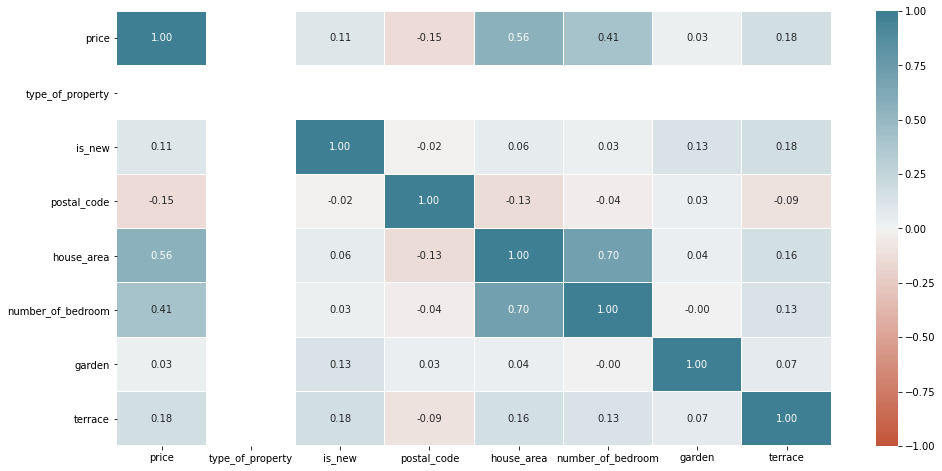

In [8]:
# Print the heatmap
plt.subplots(figsize=(16, 8))   
sns.heatmap(df_apartment.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [9]:
X = df_apartment.drop(columns=['price', 'garden'])
X.head()

,type_of_property,is_new,postal_code,house_area,number_of_bedroom,terrace
0,1,1,1180,65,1,1
1,1,1,1180,73,1,1
2,1,1,1180,100,2,1
3,1,1,1160,87,2,1
4,1,1,6000,63,1,0


In [10]:
y = df_apartment[['price']]
y.head()

,price
0,280000
1,282500
2,412500
3,380000
4,165000


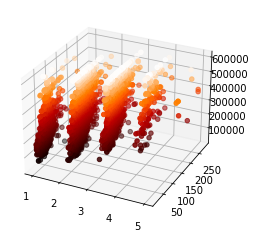

In [11]:
# %matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D( X['number_of_bedroom'],X['house_area'], y, c=y, cmap='gist_heat')
ax.view_init(27, -64)

#### Split the dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [13]:
X_train.shape

(5775, 6)

### Scaler

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Init a standard scaler
ss = MinMaxScaler()

# Scale the features
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### 1. Multiple linear regression

In [15]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train) # Entrainement du model

LinearRegression()

In [16]:
score = regressor.score(X_train,y_train)
score # so so bad

0.32633271144433085

In [17]:
score = regressor.score(X_test,y_test)
score # so so bad

0.34310699128784994

### 2. With polynomial regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 5

pipe=make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [19]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [20]:
pipe.score(X_train, y_train)

0.483619709007694

In [21]:
pipe.score(X_test, y_test)

0.4836092658187072

### 3. KNN Regressor

In [22]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [23]:
knn.score(X_train, y_train)

0.7060639850393094

In [24]:
knn.score(X_test, y_test)

0.586896304471881

### 4. Decision Trees

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(random_state=42, max_depth=9, min_samples_split=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_split=20, random_state=42)

In [26]:
regressor.score(X_train, y_train)

0.7323547264805856

In [27]:
regressor.score(X_test, y_test)

0.6102123639075594

### 5. Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

<ipython-input-28-158bccde1789>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)


RandomForestRegressor(max_depth=2, random_state=0)

In [29]:
regr.score(X_train, y_train)

-0.4509752959821227

In [30]:
regr.score(X_test, y_test)

-0.5245039440596546

### 6.Gradient boost

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0, n_estimators=300)
reg.fit(X_train, y_train)

/home/leersla/Desktop/Turing4/ImmoEliza-API/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(n_estimators=300, random_state=0)

In [32]:
reg.score(X_train, y_train)

0.7558665278948922

In [33]:
reg.score(X_test, y_test)

0.7305714085760606

### 7. XGB

In [34]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=1000, learning_rate=0.02)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
xgb_model.score(X_train, y_train)

0.8485375544519738

In [36]:
xgb_model.score(X_test, y_test)

0.737423320452161

### CatBoostRegressor

In [37]:
from catboost import CatBoostRegressor

cbr_model = CatBoostRegressor(learning_rate=0.01, depth=9, iterations=10000, random_seed=42, loss_function='RMSE', od_type='Iter')
fit_model = cbr_model.fit(X_train,
                          y_train,
                          eval_set=(X_test, y_test),
                          use_best_model=True,
                          early_stopping_rounds=10,
                          verbose=100)

print(fit_model.get_params())

0:	learn: 113578.2730542	test: 114456.4897538	best: 114456.4897538 (0)	total: 58.7ms	remaining: 9m 46s
100:	learn: 83490.4215620	test: 84289.5982046	best: 84289.5982046 (100)	total: 1.06s	remaining: 1m 43s
200:	learn: 73785.5195178	test: 74125.3747816	best: 74125.3747816 (200)	total: 1.74s	remaining: 1m 24s
300:	learn: 69421.3519802	test: 69691.7879049	best: 69691.7879049 (300)	total: 2.31s	remaining: 1m 14s
400:	learn: 66918.0481564	test: 67415.6002792	best: 67415.6002792 (400)	total: 3.17s	remaining: 1m 15s
500:	learn: 65156.2771969	test: 65981.9514694	best: 65981.9514694 (500)	total: 3.78s	remaining: 1m 11s
600:	learn: 63887.1077233	test: 65013.9974492	best: 65013.9974492 (600)	total: 4.3s	remaining: 1m 7s
700:	learn: 62784.2800833	test: 64170.5233389	best: 64170.5233389 (700)	total: 4.84s	remaining: 1m 4s
800:	learn: 61789.5764754	test: 63496.1755194	best: 63496.1755194 (800)	total: 5.4s	remaining: 1m 2s
900:	learn: 60821.8371821	test: 62759.6952000	best: 62759.6952000 (900)	total:

In [38]:
fit_model.score(X_test, y_test)

-1074.129297804587

In [39]:
y_pred = fit_model.predict(X_test)
r2_score(y_test, y_pred)

0.7370959128152171

## Pickle it

In [40]:
# import pickle
# tup = (xgb_model, ss)
# pickle.dump(tup, open("model_bin/house_model.p", "wb" ))